In [29]:
import supermarq 
from __future__ import annotations
import cirq
#import qiskit
from qiskit.quantum_info import hellinger_fidelity
from supermarq.benchmark import Benchmark
from qiskit import transpile, QuantumCircuit
import qiskit.quantum_info as qi
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, amplitude_damping_error
from qiskit.tools.visualization import plot_histogram
from qiskit import *
from time import *
import numpy as np

In [30]:
import qiskit_superstaq as qss
import os

In [31]:
ghz = supermarq.ghz.GHZ(3)
ghz_circuit = ghz.qiskit_circuit()
ghz_circuit.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

In [32]:
ghz_features = [
    supermarq.converters.compute_communication_with_qiskit(ghz_circuit),
    supermarq.converters.compute_depth_with_qiskit(ghz_circuit),
    supermarq.converters.compute_entanglement_with_qiskit(ghz_circuit),
    supermarq.converters.compute_liveness_with_qiskit(ghz_circuit),
    supermarq.converters.compute_measurement_with_qiskit(ghz_circuit),
    supermarq.converters.compute_parallelism_with_qiskit(ghz_circuit),
]
print(ghz_features)

[0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0.0]


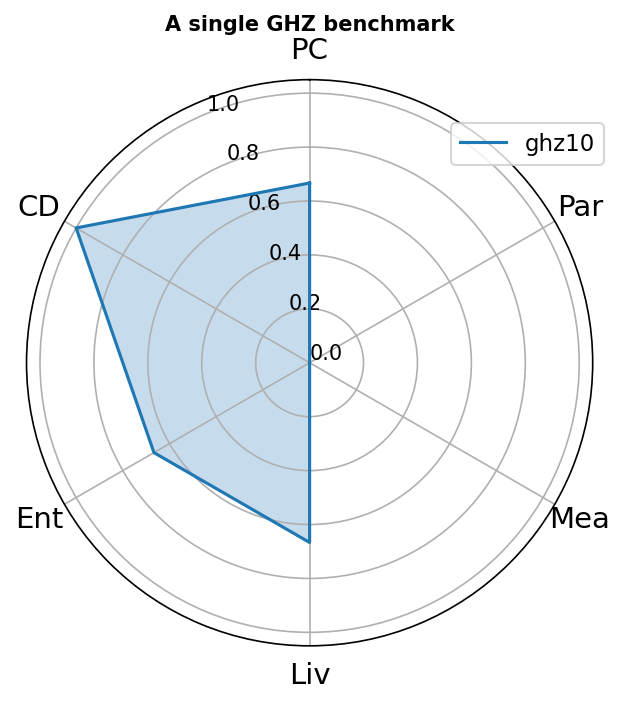

In [33]:
supermarq.plotting.plot_benchmark(
    ["A single GHZ benchmark", ["ghz10"], [ghz_features]],
    spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
)

In [34]:
benchmark_features = {}

benchmarks = [(supermarq.ghz.GHZ(3), "ghz3"),]

for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),
    ]
print(benchmark_features)

{'ghz3': [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0]}


In [37]:
provider = qss.SuperstaqProvider("202f97a1b99771c90c22cbffdcd384824ca47f7cdf2d73e586d9d497a1b1908c")
print(provider.get_balance())

20.00 credits


In [28]:
# See which targets are available
provider.get_targets(available=True)

[Target(target='aqt_keysight_qpu', supports_submit=False, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='aqt_zurich_qpu', supports_submit=False, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='aws_dm1_simulator', supports_submit=True, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='aws_sv1_simulator', supports_submit=True, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='aws_tn1_simulator', supports_submit=True, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='cq_sqale_simulator', supports_submit=False, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='cq_sqorpius_qpu', supports_submit=False, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target

In [44]:
superstaq = qss.superstaq_provider.SuperstaqProvider("202f97a1b99771c90c22cbffdcd384824ca47f7cdf2d73e586d9d497a1b1908c")
superstaq.get_targets(available=True)

[Target(target='aqt_keysight_qpu', supports_submit=False, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='aqt_zurich_qpu', supports_submit=False, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='aws_dm1_simulator', supports_submit=True, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='aws_sv1_simulator', supports_submit=True, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='aws_tn1_simulator', supports_submit=True, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='cq_sqale_simulator', supports_submit=False, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target='cq_sqorpius_qpu', supports_submit=False, supports_submit_qubo=False, supports_compile=True, available=True, retired=False),
 Target(target

In [58]:
print(provider.get_balance())

19.45 credits


In [57]:
import qiskit as qiskit
backend = superstaq.get_backend("qscout_peregrine_qpu")
qc = qiskit.QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)
job = backend.run(qc, shots=100, method="dry-run")

In [59]:
print(job.result().get_counts())


{'00': 45, '11': 55}


In [55]:
ghz_circuit.measureall()

AttributeError: 'QuantumCircuit' object has no attribute 'measureall'

In [54]:
job_qss = backend.run(ghz_circuit, shots=100, method="dry-run")
job_qss.status()

ValueError: Circuit has no measurements to sample.